# Homework 3 Solutions

In [1]:
# Import modules
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import time

# Use LaTex
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn')

# Problem 1
We will create a toy model to illustrate how difficult it is to determine an investor's skill. This model assumes that investors are either skilled or unskilled, each has control of an equal amount of capital, and that market beats are independent. Let us say that skilled investors have a 55\% chance of beating the market, and unskilled investors have a 46\% chance of beating the market. Use the class $\texttt{binom}$ within $\texttt{scipy.stats}$ to solve this problem.

(a) Because of transaction costs and fees, the average investor should beat the market slightly less than 50\% of the time. If we assume that the average investor beats the market 47\% of the time, what fraction of investors must be skilled?

**Solution** If $p$ is the probability of a market beat, we have
$$
E[p] = E[p|\text{skilled}] P(\text{skilled}) + E[p|\text{unskilled}] P(\text{unskilled}).
$$
In this case, if $f$ is the fraction of investors skilled,
$$
47\% = 55\% \times f + 46\% \times (1 - f)\qquad\text{implies}\qquad f = \frac{1}{9}.
$$
Hence, under these assumptions, one-ninth of investors are skilled.


In [2]:
# Set random seed
np.random.seed(0)

# Create function for using Bayes' rule
def prob_bayes(n, k, prob_beat_skilled = 0.55, prob_beat_unskilled = 0.46, 
               prop_skilled = 1/9):
    
    # Get the probability of at least k beats if skilled
    prob_skilled_beats = stats.binom.sf(k - 1, n, p = prob_beat_skilled)
    
    # Get the probability of at least k beats if unskilled
    prob_unskilled_beats = stats.binom.sf(k - 1, n, p = prob_beat_unskilled)
    
    # Use Bayes rule to calculate probability of skilled given k beats in n years
    prob = (prob_skilled_beats * prop_skilled)/(prob_skilled_beats * prop_skilled 
                                        + prob_unskilled_beats * (1 - prop_skilled))
    
    return prob

# Create function to obtain approximately same result using a simulation
def prob_sim(n, k, prob_beat_skilled = 0.55, prob_beat_unskilled = 0.46, 
             prop_skilled = 1/9, num_investors = 1_000_000):
    
    # Number of skilled investors
    num_skilled = int(prop_skilled * num_investors)
    
    # Number of unskilled investors
    num_unskilled = num_investors - num_skilled
    
    # Simulate number of beats for skilled investors
    sim_skilled = stats.binom.rvs(p = prob_beat_skilled, n = n, size = num_skilled)
    
    # Simulate number of beats for unskilled investors
    sim_unskilled = stats.binom.rvs(p = prob_beat_unskilled, n = n, size = num_unskilled)
    
    # Calculate number of skilled that beat at least k times...
    # ... divided total number that beat at least k
    prob = np.sum(sim_skilled >= k)/(np.sum(sim_skilled >= k) + np.sum(sim_unskilled >= k))
    
    return prob
     

(b)  Given that an investor beat the market last year, use Bayes' rule to determine the probability that she is skilled.

In [3]:
print(f'The probability that this investor is skilled is {100 * prob_bayes(n = 1, k = 1): .2f}%.')

The probability that this investor is skilled is  13.00%.


(c) Use Bayes' rule to determine the probability that an investor is skilled given that she beats the market in at least two of the last three years.

In [4]:
print(f'The probability that this investor is skilled is {100 * prob_bayes(n = 3, k = 2): .2f}%.')

The probability that this investor is skilled is  14.03%.


(d) Verify (c) using a simulation. Suppose there are 1,000,000 investors and determine the number of skilled and unskilled investors. Then simulate the number of times each investor beats the market over the last three years for each skill level. Use these results to find the ratio of skilled investors that beat the market at least twice to the total number of investors that beat the market at least twice.


In [5]:
print(f'The probability that this investor is skilled is {100 * prob_sim(n = 3, k = 2): .2f}%.')

The probability that this investor is skilled is  14.03%.


(e) Using either Bayes' rule or a simulation create a graph of the number of years examined to the probability of being skilled. Let the horizontal axis represent the number of years $n$ and consider $2 \leq n \leq 10$. Then use $\texttt{plot}$ in $\texttt{matplotlib.pyplot}$ to graph the probabilities of being skilled given at least $n - 2$, $n-1$, and $n$ market beats in the last $n$ years. Add a legend to help distinguish your three plots.

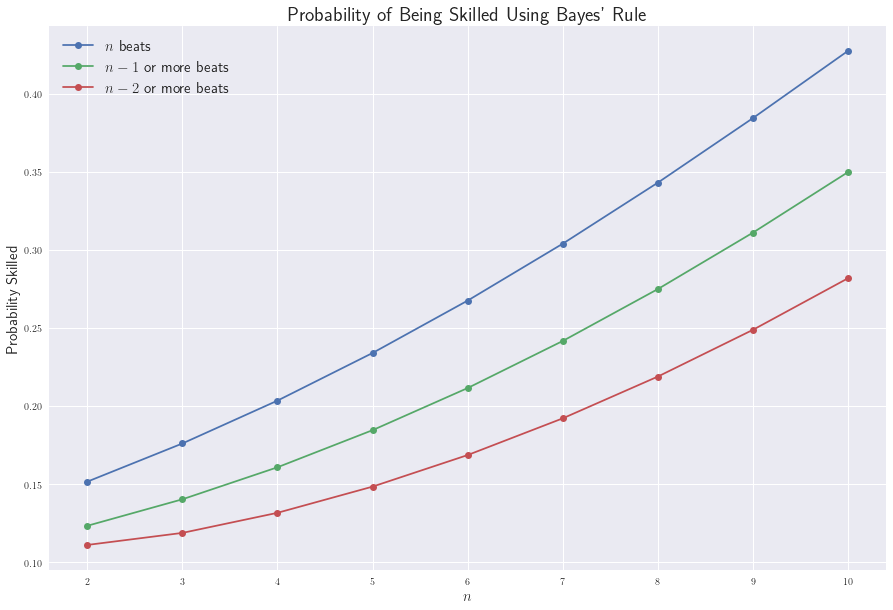

In [6]:
# Get n-values between 2 and 10, inclusive
n_vals = np.arange(2, 11)

# Set figure size
plt.figure(figsize = (15, 10))

# Plot n beats in n years
plt.plot(n_vals, prob_bayes(n_vals, n_vals), marker = 'o', 
         label = '$n$ beats')

# Plot n - 1 beats in n years
plt.plot(n_vals, prob_bayes(n_vals, n_vals - 1), marker = 'o',
         label = '$n - 1$ or more beats')

# Plot n - 2 beats in n years
plt.plot(n_vals, prob_bayes(n_vals, n_vals - 2), marker = 'o', 
         label = '$n - 2$ or more beats')

# Give x-axis a label
plt.xlabel('$n$', fontsize = 15)

# Give y-axis a label
plt.ylabel('Probability Skilled', fontsize = 15)

# Give the plot a title
plt.title("Probability of Being Skilled Using Bayes' Rule", fontsize = 20)

# Add a legend and change font size
plt.legend(fontsize = 15)

plt.show()

## Problem 2
Assume that $R$ is the random variable representing the monthly return of a stock and $X = \ln(1 + R) \sim{\mathcal{N}(\mu, \sigma^2)}$, i.e. the corresponding continuous return $X$ follows a normal distribution.

(a) Suppose $X_k\sim{\mathcal{N}(\mu, \sigma^2)}$ for $k = 1, 2,\ldots, 12$. Assume $X_i$ and $X_j$ are independent for $i \neq j$. Because you can add continuous returns to find the total return over multiple periods, the total return over a twelve month period is
$$
Y = X_1 + X_2 + \ldots + X_{12}.
$$
Find $E\left[Y\right]$ and $\text{Var}\left(Y\right)$.

**Solution.** The expected value of $Y$ is
$$
\begin{align*}
    E[Y] &= E[X_1 + X_2 + \ldots + X_{12}]\\
         &= E[X_1] + E[X_2] + \ldots + E[X_{12}]\\
         &= \mu + \mu + \ldots + \mu\\
         &= 12\mu
\end{align*}
$$
and
\begin{align*}
\text{Var}(Y) &= \text{Var}(X_1 + X_2 + \ldots + X_{12})\\
              &= \sum_{i = 1}^{12}\sum_{j = 1}^{12} \text{Cov}(X_i, X_j)\\
              &= \sum_{i = 1}^{12} \text{Var}(X_i) + 2\sum_{i < j} \text{Cov}(X_i, X_j)\\
              &= 12\sigma^2 + 2\sum_{i < j} \text{Cov}(X_i, X_j).
\end{align*}
Sine we are assuming $X_i$ and $X_j$ are independent, $\text{Cov}(X_i, X_j) = 0$ for $i\neq j$. Hence,
$$
\text{Var}(Y) = 12\sigma^2.
$$

| Month | April | May | June |
| --- | --- | --- | --- |
| Return | -4% | 5% | 3% |

We would like to determine the annualized mean and standard deviation using the monthly returns in the table. The most common way to annualize monthly returns and variances is via $\bar{R}\mapsto 12\cdot\bar{R}$ and $s^2 \mapsto 12\cdot s^2$, where $\bar{R}$ and  $s^2$ denote the respective sample mean and variance of $R$. This is not the best method from a mathematical perspective because it ignores compounding. However, this technique is more reasonable for continuous returns due to (a). With that in mind, given the discrete expected return and variance, we can calculate $\mu$ and $\sigma^2$, annualize them, and then convert them to discrete annual returns. To accomplish this, note that
$$
E[R] = E\left[ e^X\right] - 1= e^{\mu + \sigma^2/2} - 1\qquad\text{and}\qquad \text{Var}(R) = \text{Var}(e^X) = (e^{\sigma^2} - 1)e^{2\mu + \sigma^2}.
$$

(b) Use the data in the table to estimate $E[R]$ and $\text{Var}(R)$ using sample statistics. Then use algebra to find the corresponding estimates of $\mu$ and $\sigma^2$. Call the respective estimates $\hat{\mu}$ and $\hat{\sigma}^2$. Annualize $\hat{\mu}$ and $\hat{\sigma}^2$ via $\hat{\mu}\mapsto 12\cdot \hat{\mu}$ and $\hat{\sigma}^2\mapsto 12\cdot \hat{\sigma}^2$.

**Solution**
Notice that
$$
E[R] = e^{\mu + \sigma^2/2} - 1
$$
implies 
$$
\begin{align*}
\text{Var}(R) &= (e^{\sigma^2} - 1)e^{2\mu + \sigma^2}\\
                &= (e^{\sigma^2} - 1)\left(e^{\mu + \frac{\sigma^2}{2}}\right)^2\\
                &= (e^{\sigma^2} - 1)\left(E[R] + 1\right)^2.
\end{align*}
$$
It follows that
$$
\sigma^2 = \ln\left[\frac{\text{Var}(R)}{(E[R] + 1)^2} + 1\right].
$$
Assuming that $\sigma^2$ is a known quantity,
$$
E[R] = e^{\mu + \sigma^2/2} - 1\qquad\text{implies}\qquad \mu = \ln\left(E[R] + 1\right) - \frac{\sigma^2}{2}.
$$
We are ready to find $\hat{\mu}$ and $\hat{\sigma}^2$.

In [7]:
# Record return values
rtns = np.array([-0.04, 0.05, 0.03])

# Calculate the mean
x_bar = np.mean(rtns)

# Calculate the sample variance
s2 = np.var(rtns, ddof = 1)

# Get sigma_hat
sigma_hat = np.sqrt(np.log(s2/(x_bar + 1)**2 + 1))

# Get mu_hat
mu_hat = np.log(x_bar + 1) - sigma_hat**2/2

# Annualize results
mu_annual = 12 * mu_hat
sigma_annual = np.sqrt(12) * sigma_hat

print(f'The annualized value of mu is {100 * mu_annual:0.2f}%,', 
      f'and annualized value of sigma^2 is {sigma_annual**2:0.4f}.')

The annualized value of mu is 14.59%, and annualized value of sigma^2 is 0.0261.


(c) Calculate the annualized discrete return and variance using your annualized results from (b).

**Solution.**

In [8]:
# Calculate the annualized discrete return
r_annual = np.exp(mu_annual + sigma_annual**2/2) - 1

# Calculate the annualized discrete standard deviation
s_annual = np.sqrt((np.exp(sigma_annual**2) - 1) * (1 + r_annual)**2)

print(f'The annualized discrete return is {100 * r_annual:0.2f}%,',
      f'and annualized variance is {s_annual**2:0.4f}.')

The annualized discrete return is 17.23%, and annualized variance is 0.0363.


# Problem 3
Within the Black-Scholes framework, the continuous return over $T$ periods of a non-dividend paying stock is $X_T\sim{\mathcal{N}\left((r - \frac{\sigma^2}{2})T, T\sigma^2\right)}$, where $r$ is the continuous risk-free rate of return. If the initial price of the stock is $S_0$, it follows that the price at time $T$ is the random variable $S_T = S_0 e^{X_T}$. Let us suppose $S_0 = 90$, $T = 2$, $r = 4\%$, and $\sigma = 45\%$. 

(a) Generate 10,000 values of $X_T$ using $\texttt{scipy.stats.norm.rvs}$. Use $\texttt{np.random.seed}$ to set the random seed to a particular number to maintain reproducibility. Then find the corresponding values of $S_T$ using the formula above. Use $\texttt{plt.subplots}$ to create a figure with two subplots, one for the histogram of $X_T$ and one for the histogram of $S_T$. For both histograms, set $\texttt{bins = 20}$ and $\texttt{density = True}$. Place a title above each subplot.

**Soluton.**

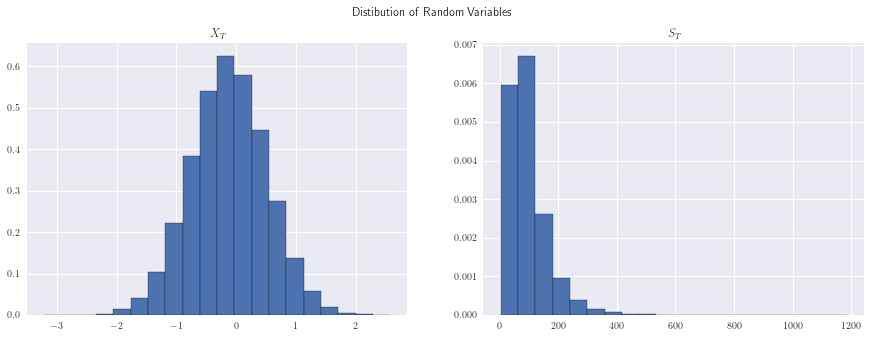

In [9]:
# Set given values
S_0, T, r, sigma = 90, 2, 0.04, 0.45

# Set the random seed
np.random.seed(0)

# Generate X_T
X_T = stats.norm.rvs(loc = (r - sigma**2/2) * T, scale = np.sqrt(T * sigma**2), 
                     size = 100_000)

# Calculate S_T
S_T = S_0 * np.exp(X_T)

# Set up subplots
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

# Create histogram
ax[0].hist(X_T, density = True, bins = 20, edgecolor = 'black')

# Give it a title
ax[0].set_title(r'$X_T$')
                
# Create histogram
ax[1].hist(S_T, density = True, bins = 20, edgecolor = 'black')

# Give it a title
ax[1].set_title(r'$S_T$')

# Give entire figure a title
plt.suptitle(r'Distibution of Random Variables')

plt.show()

(b) We can use your results in part (a) to price a European call option for this stock. This option gives the owner the right, but not the obligation, to convert to equity for a price of $K$ at maturity. The fair value of this option---given our assumptions---is
$$
C = e^{-rT} E\left[ \text{max}(S_T - K, 0)\right].
$$
Compute the payoff $\text{max}(S_T - K, 0)$ for each of the values of $S_T$ from (a). Take the mean to estimate the expected payoff. Lastly, discount the expected payoff to the present value using $e^{-rT}$.

**Solution**.

In [10]:
# Define K
K = 100

# Calculate C
C_mc = np.exp(-r * T) * np.maximum(S_T - K, 0).mean()

print(f'The value of this call option using the simulations is {C_mc:0.2f}.')

The value of this call option using the simulations is 21.52.


(c) The Black-Scholes formula for the value of a European call option is
$$
C = S_0 \Phi(d_1) - K e^{-rT} \Phi(d_2),
$$
where
$$
d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)T }{\sigma\sqrt{T}}\qquad\text{and}\qquad d_2 = d_1 - \sigma\sqrt{T}.
$$
Use the formula to verify your result in (b). Because of the stochastic nature of the calculation in (b), your result in (c) may not be exactly the same. 

**Solution**

In [11]:
# Get a function that gives the Black-Scholes values of a call option
def bs_call(S_0, K, r, T, sigma):
    
    d_1 = (np.log(S_0/K) + (r + sigma**2/2) * T)/(sigma * np.sqrt(T))
    d_2 = d_1 - sigma * np.sqrt(T)
    
    call = S_0 * stats.norm.cdf(d_1) - K * np.exp(-r * T) * stats.norm.cdf(d_2)
    
    return call

# Get the value of the call option
C_bs = bs_call(S_0, K, r, T, sigma)

print(f'The value of this call option using the Black-Scholes formula is {C_bs:0.2f}.')

The value of this call option using the Black-Scholes formula is 21.62.


The simulation produced an answer relatively far from (c). Let's plot call prices obtained from simulations for various $n$ to check that the the values converge to the Black-Scholes result as $n$ gets larger.

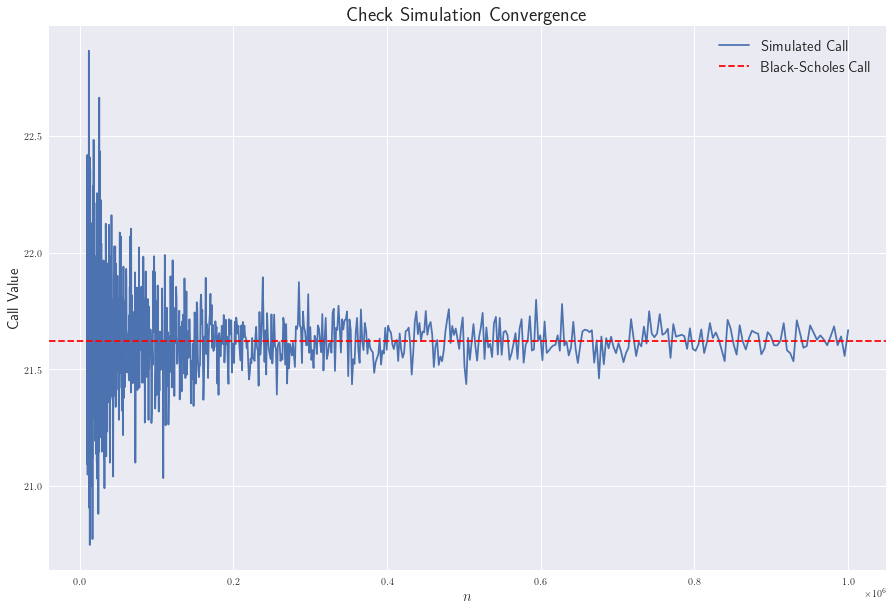

This program took 0.30 minutes.


In [12]:
# Start the clock
start_time = time.perf_counter()

# Create function to make it easy to evaluate for different sizes
def mc_call(S_0, K, r, T, sigma, size = 100_000):
    
    # Generate X_T
    X_T = stats.norm.rvs(loc = (r - sigma**2/2) * T, 
                     scale = np.sqrt(T * sigma**2), 
                     size = int(size))

    # Calculate S_T
    S_T = S_0 * np.exp(X_T)
    
    # Calculate C
    C_mc = np.exp(-r * T) * np.mean(np.maximum(S_T - K, 0))
    
    return C_mc

# Vectorize function, since slow
mc_call = np.vectorize(mc_call)

# Pick some n-values
n_vals = np.logspace(np.log2(1e4), np.log2(1e6), 1000, base = 2).astype(int)

# Set figure size
plt.figure(figsize = (15, 10))

# Get corresponding call-values
call_vals = mc_call(S_0, K, r, T, sigma, n_vals)

# Plot results
plt.plot(n_vals, call_vals, label = 'Simulated Call')

# Plot horizontal dashed line for true value
plt.axhline(C_bs, xmin = 0, xmax = n_vals[-1], color = 'red', 
                  linestyle = 'dashed', label = 'Black-Scholes Call')

# Add label for the x-axis
plt.xlabel(r'$n$', fontsize = 15)

# Add label for the y-axis
plt.ylabel('Call Value', fontsize = 15)

# Add a legend
plt.legend(fontsize = 15)

# Give the figure a title
plt.title('Check Simulation Convergence', fontsize = 20)

plt.show()
    
print(f'This program took {(time.perf_counter() - start_time)/60:.2f} minutes.')

The figure above confirms convergence.